Punto 1

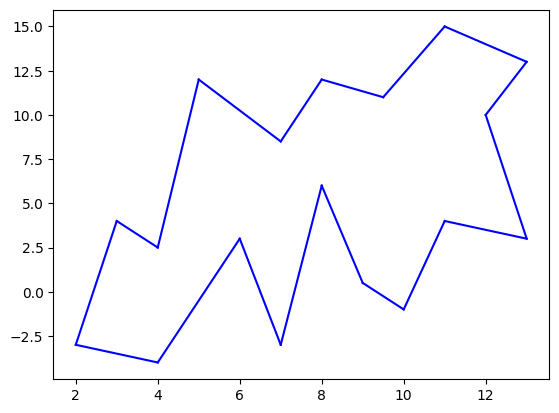

In [2]:
import matplotlib.pyplot as plt 

class cara:
    def __init__(self):
        self.arista_inci =None 

class arista:   #Se crea la clase que contiene los datos de todas las aristas 
    def __init__(self):
        self.origin = None #El vertice origen de la arista 
        self.fin = None  #el vertice al que se dirige la arista 
        self.twin = None #La arista que va en la otra direccion 
        self.next = None #La arista siguiente 
        self.prev = None #La arista anterior 
        self.sentido =None #True para sentido a y false para b, para posterior manipulacion de la lista 
        self.cara=None #La cara a la que pertenece         

#Se crea la clase de tal modo que se puedan agregar los valores mas adelante 

u=((9, 0.5), (8, 6), (7, -3), (6, 3), (4, -4), (2, -3), (3, 4), (4, 2.5), 
   (5, 12), (7, 8.5), (8, 12), (9.5, 11), (11, 15), (13, 13), (12, 10), (13, 3), (11, 4), (10, -1), (9, 0.5))
#La lista de los valores del problema 
def doblementeconectadas(u):
    f=-1
    sentidoa=[] #Se almacenan todas las aristas que vayan en el orden de los puntos 
    sentidob=[] #se almacenan las aristas contrarias al orden de los puntos 
    for i in range(0,len(u)-1): #Se crea un bucle para acceder a todos los vertices para las posibles aristas 
      f=f+1
      a=u[f] 
      b=u[f+1]
      
      sta=arista()  #Se crea la arista en el sentido de los puntos con los dos vertices que se analizan de la lista 
      sta.origin = a #Se pone el vertice de origen en la arista 
      sta.fin = b #Se pone el vertice final en la arista 
      sta.sentido = True # Se pone el sentido de la arista 
      
      stb=arista() #Se repite el proceso pero para las aristas con sentido contrario 
      stb.origin = b
      stb.fin = a
      stb.sentido = False 
      
      sta.twin=stb #se pone el gemelo en las aristas 
      stb.twin=sta 
      sentidoa.append(sta) #Finalmente se pone el objeto en la lista que corresponde dependiendo el sentido 
      sentidob.append(stb) 
    
    #Una vez se crean las listas se añaden los atributos next y prev en cada una de las sublistas 
    f=-1
    for i in range (0, len(sentidoa)-2): #Se crea un bucle para acceder a las aristas 
      f=f+1 
      a=sentidoa[f] 
      b=sentidoa[f+1]
      c=sentidoa[f+2] #se toman 3 elementos en cada iteracion y se modifica el del medio para añadirle los valores 
      b.next = c      #de next y prev 
      b.prev = a
    f=-1 #Se resetea el contador 
    for i in range (0, len(sentidob)-2): #Se hace lo mismo pero con la otra lista intercambiando next y prev 
      f=f+1                                 #Ya que el sentido es inverso 
      a=sentidob[f]
      b=sentidob[f+1]
      c=sentidob[f+2]
      b.next = a
      b.prev = c
    
    
    ga=sentidoa[0]
    ga.next= sentidoa[1]
    ga.prev= sentidoa[len(sentidoa)-1] #Notese que el buble for no cubre el primer y ultimo elemento, por lo que 
    ta=sentidoa[len(sentidoa)-1]       #se realiza de manera manual para estos dos casos 
    ta.next= sentidoa[0]
    ta.prev= sentidoa[len(sentidoa)-2]
    
    
    gb=sentidob[0]  #Se hace lo mismo para la otra lista 
    gb.next= sentidoa[len(sentidoa)-1]
    gb.prev= sentidoa[1]
    tb=sentidob[len(sentidoa)-1]
    tb.next= sentidoa[len(sentidoa)-2]
    tb.prev= sentidoa[0]
    
    doblemente_conectadas = sentidoa + sentidob # Finalmente se concatenan ambas listas para la lista de aristas doblemte conectadas 
    return doblemente_conectadas

po= doblementeconectadas(u)

fig, ax = plt.subplots()
f=-1
for i in range(len(po)): #Se itera sobre la lista y se dibujan las aristas que van en un determinado sentido 
    f=f+1
    w =po[f]
    if w.sentido == True: 
        i=w.origin 
        o=w.fin
        
        ax.plot([o[0], i[0]], [o[1], i[1]], color='blue')





Punto 2 

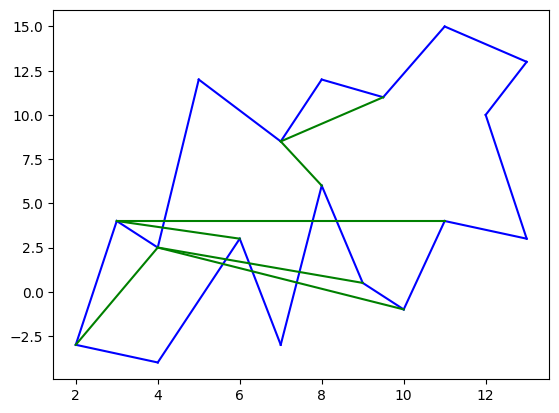

In [13]:
import heapq
import math 
import matplotlib.pyplot as plt 

def intersec(seg1, seg2):
    x1, y1 = seg1[0]
    x2, y2 = seg1[1]
    x3, y3 = seg2[0]  # Se cogen las componentes x y y de cada uno de los segmentos 
    x4, y4 = seg2[1]
    dx1,dy1 = x2-x1, y2-y1
    dx2,dy2 = x4-x3, y4-y3
    det = (dx1*dy2)-(dx2*dy1)
    if det == 0:
        return False  
    if max(x1, x2) < min(x3, x4) or max(x3, x4) < min(x1, x2) or max(y1, y2) < min(y3, y4) or max(y3, y4) < min(y1, y2):
        return False  # Se evaluan estas dos condiciones y en caso de que se cumplen retorna falso porque no se intersectan
    f1 = ((dx2*(y1-y3)-dy2*(x1-x3))/ det)
    f2 = ((dx1*(y1-y3)-dy1*(x1-x3))/ det)
    g1 = 0<=f1<=1
    g2 = 0<=f2<=1
    return g1 and g2  #Los segmentos se intersectan, se retorna de esta manera para evitar duplicados 
    
def linea_barrido(segmentos):
    eventos = []  #se crea un array para los eventos
    p= enumerate(segmentos)
    for i, segment in p:
        (x1,y1),(x2,y2) = segment #Las componentes x y y de ambos puntos se extraen del segmento 
        if x1>x2:
            segment = (segment[1],segment[0]) #Se ordenan los segmentos de tal manera que el primer punto del segmento este mas a la derecha 
            x1, y1, x2, y2 = x2, y2, x1, y1
        heapq.heappush(eventos, (x1, i, "left"))   #Se pone el elemento en la cola de eventos 
        heapq.heappush(eventos, (x2, i, "right")) #gracias a la funcion heappush se mantiene la invariante 
   
    intersecciones = []
    seg_intersec = []    # Segmentos de interseccion 
    seg_acts = set()  # Segmentos activos 
    while eventos: #Mientras haya eventos en el array de eventos se itera 
        x, i, tipo = heapq.heappop(eventos) #heap.pop retorna y elimina el elemento mas pequeno de eventos y los valores se guardan en x, i, tipo respectivamente
        segment = segmentos[i] #Se coge el segmento asociado al evento 
        if tipo == "left":
            for seg_act in seg_acts: #Se itera con respecto a la lista de segmentos activos 
                if intersec(seg_act, segment):
                    xa = (x - seg_act[0][0]) / (seg_act[1][0] - seg_act[0][0]) * (seg_act[1][1] - seg_act[0][1]) + seg_act[0][1]
                    #Se usa x y xa para saber el punto de interseccion con base al segmento activo  
                    intersecciones.append((x, xa )) #Se agrega el punto de interseccion 
                    seg_intersec.append((seg_act, segment)) #Se agrega a la lista de segmentos activos 
            seg_acts.add(segment) #Como es "left " se agrega el segmento a la lista de segmentos activos 
        else:
            seg_acts.remove(segment) #Como es "right" se elimina el segmento a l inicio al lugar de agregarlo al final  
            for seg_act in seg_acts: #Por lo demas es igual al caso "left "
                if intersec(seg_act, segment):
                    xa = (x - seg_act[0][0]) / (seg_act[1][0] - seg_act[0][0]) * (seg_act[1][1] - seg_act[0][1]) + seg_act[0][1]
                    intersecciones.append((x, xa))
                    seg_intersec.append((seg_act, segment))
    return intersecciones, seg_intersec


def angulo(a,b,c): #B es el vertice a evaluar y a y c son adyacentes 
    v1x= b[0]-a[0]
    v1y= b[1]-a[1]
    v2x= c[0]-b[0] #se generan los vectores para usar atan2
    v2y= c[1]-b[1]
    rg = (v1x*v2y-v1y*v2x)
    rd=  (v1x*v2x+v1y*v2y)
    ang = math.atan2(rg,rd)
    angulo = math.degrees(ang)
    return angulo 

def order(a,b):
    if a[1]>b[1]:
        return 0    #a esta arriba de b
    elif a[1]<b[1]:
        return 1    #b esta arriba de a 
    elif a[0]<b[0]:
        return 0
    elif a[0]>b[0]:
        return 1
    else:
        return 2 #Ninuna de las anteriores 

def tipo_ver(a,b,c): #se creas una funcion para clasificar los vertices utilizando las dos anteriores 
    ang=angulo(a,b,c)
    ab=order(a,b)
    cb=order(c,b)
    if ab==1 and cb==0:
        return 1 #Vertice regular 
    elif ab==0 and cb==1:
        return 1 #Vertice regular 
    elif ab==1 and cb==1:
        if 0<ang<180:
            return 2 #Vertice division
        else:
           return 3 #Vertice inicio 
    elif ab==0 and cb==0:
        if 0<ang<180:
            return 4 #Vertice union 
        else:
            return 5 #Vertice fin
        

f=-1 
for i in range (0, len(sentidoa)-2):#Se clasifican los vertices origen de uno de los sentidos de las aristas doblemente conectadas 
  f=f+1                             #Con las funciones definidas anteriormente 
  a=sentidoa[f] 
  b=sentidoa[f+1]
  c=sentidoa[f+2] 
  a1 = a.origin    
  b1 = b.origin
  c1 = c.origin 
  w = tipo_ver(a1,b1,c1)
  b.tipo_origen = w

ga=sentidoa[0]
gawe= tipo_ver((10,-1),(9,0.5),(8,6))  #El ciclo for anterior no abarca el primer ni el ultimo elemento, por lo que 
ga.tipo_origen = gawe                  #Se realiza manualmente  

ta=sentidoa[len(sentidoa)-1]       
tawe= tipo_ver((11,4),(10,-1),(9,0.5))
ta.tipo_origen = tawe




class Node :  #Se crea un nodo para el arbol binario
    def __init__(self,data):  
        self.data = data
        self.left = None
        self.right= None

def insertBST(root, node ):
    e=node.data
    w=root.data
    if (e[1] < w[1]):
        if root.right is None:
            root.right = node
        else:
            insertBST(root.right , node)
    elif (e[1] == w[1]) and ((e[0] > w[0])) :  #Se insertan los nodos al arbol por el orden del algoritmo
        if root.right is None:
            root.right = node
        else:
            insertBST(root.right , node)
        
    else :
        if (root.left is None):
            root.left = node 
        else: 
            insertBST(root.left, node)

def inorder(root): #Se imprime el arbol 
    inorderArr=[]
    if root.left is not None:
        leftInorderArr= inorder(root.left)
        inorderArr.extend(leftInorderArr)       
    inorderArr.append(root.data)
    if root.right is not None:
        rightInorderArr = inorder(root.right)
        inorderArr.extend(rightInorderArr)
    return inorderArr


u=( (8, 6), (7, -3), (6, 3), (4, -4), (2, -3), (3, 4), (4, 2.5), 
   (5, 12), (7, 8.5), (8, 12), (9.5, 11), (11, 15), (13, 13), (12, 10), (13, 3), (11, 4), (10, -1), (9, 0.5))
#Se elimina el (9, 0.5) de la lista original para que no hayan vertices repetidos 
root=Node(u[0])

f=0
for i in range(len(u)-1): #Se pone u en el arbol binario para que los vertices queden en el orden deseado en 
    f=f+1                 #Un nuevo array lop
    insertBST(root, Node(u[f]))

lop = inorder(root) 

priority_q = [] #Se crea una lista vacia para almacenar las aristas con el orden deseado 
f=-1

for i in range(len(lop)): #Se recorre la lista de vertices ordenados 
    f=f+1
    uj=lop[f]
    p=-1
    for i in range (len(sentidoa)): #en cada vertice se examinan los origenes de las aristas y se añade a priority_q
        p=p+1                       #la arista cuyo origen sea igual al vertice a examinar , por lo que asi  
        pl = sentidoa[p]            #priority_q tendra el orden deseado 
        ps = pl.origin
        if ps == uj:
            priority_q.append(pl)


segments=[]
u=( (9, 0.5),(8, 6), (7, -3), (6, 3), (4, -4), (2, -3), (3, 4), (4, 2.5), 
   (5, 12), (7, 8.5), (8, 12), (9.5, 11), (11, 15), (13, 13), (12, 10), (13, 3), (11, 4), (10, -1), (9, 0.5))

f=-1
for i in range(len(u)-1):
    f=f+1
    segments.append((u[f],u[f+1]))
    y=u[f]
    segments.append((u[f],(1000,y[1])))

intersecciones, seg_intersec = linea_barrido(segments) #Se llama la linea de barrido 
gd=[]
for segment1, segment2 in seg_intersec:
    if segment1[1]!= segment2[0]  and segment1[0]!= segment2[0] and segment1[1]!= segment2[1]  and segment1[0]!= segment2[1]: 
        g=segment1[0]
        if segment1[1] == (1000, g[1] ):
             
            gd.append(segment1[0])
            

gl = list( dict.fromkeys(gd) )

            
def y_monotono(priory):
    f=-1
    t=[]
    w=[]
    ok=priory[0]
    helper= (ok.origin, ok.tipo_origen)
    for i in range(len(priory)):
        f=f+1
        lp=priory[f]
        ak=lp.origin
        pol= lp.tipo_origen
        
        if pol ==1: # regular 
            if ak in gl:
                if helperant[1] ==  4 :
                    j=arista()
                    j.origin=ak
                    j.fin= helperant[0]
                    w.append(j)
                #Delete ei-1 from t
                #search in t to find edge ej directly left of vi
                if helper[1] ==  4 :
                    j=arista()
                    j.origin=ak
                    j.fin= helper[0]
                    w.append(j)
                helperant=helper
                helper=(lp.origin, lp.tipo_origen)
        elif pol ==2: # division / split 
            #search in t to find edge ej directly to the left of vi
            j=arista()
            j.origin=ak
            j.fin= helper[0]
            w.append(j)
            helperant=helper
            hepler=(lp.origin, lp.tipo_origen)
        elif pol ==3: # inicio 
            t.append(lp)
            helperant=helper
            helper=(lp.origin, lp.tipo_origen)
            
        elif pol ==4: # union /merge 
            if helperant[1]==4:
                j=arista()
                j.origin=ak
                j.fin= helperant[0]
                w.append(j)
            #Delete ei-1 from t
            #search in t to find edge ej directly to the left of vi
            if helper[1]==4:
                j=arista()
                j.origin=ak
                j.fin= helper[0]
                w.append(j)
            helperant=helper
            helper=(lp.origin, lp.tipo_origen)
        elif pol ==5: # fin 
            if helperant[1]==4:
                j=arista()
                j.origin=ak
                j.fin= helperant[0]
                w.append(j)
        #Delete ei-1 from t
    return w
gh = y_monotono(priority_q)
gty=[]
gtyf=[]
f=-1
for i in range(len(gh)):
    f=f+1
    op = gh[f]
    uy= op.origin
    gty.append(uy)
f=-1
for i in range(len(gh)):
    f=f+1
    op = gh[f]
    uy= op.fin
    gtyf.append(uy)


fig, ax = plt.subplots()


# Add labels and title
# plt.xlabel('X-axis')
# plt.ylabel('Y-axis')
# plt.title('Line Plot')

u=( (9, 0.5),(8, 6), (7, -3), (6, 3), (4, -4), (2, -3), (3, 4), (4, 2.5), 
   (5, 12), (7, 8.5), (8, 12), (9.5, 11), (11, 15), (13, 13), (12, 10), (13, 3), (11, 4), (10, -1), (9, 0.5))
f=-1
for i in range(0,len(u)-1):
    f=f+1
    g=u[f]
    h=u[f+1]
    ax.plot([g[0], h[0]], [g[1], h[1]], color='blue')

f=-1
for i in range(0,len(gty)):
    f=f+1
    g=gty[f]
    h=gtyf[f]
    ax.plot([g[0], h[0]], [g[1], h[1]], color='green')
    
plt.show()


Desafortunadamente estas no son particiones y-monotonas 

Punto 3

Para este punto se asume que ya se tiene una lista de poligonos y-monotonos, en este caso se representan como una lista normal de puntos y al final se convierte la respuesta en una lista de aristas doblemente conectadas 

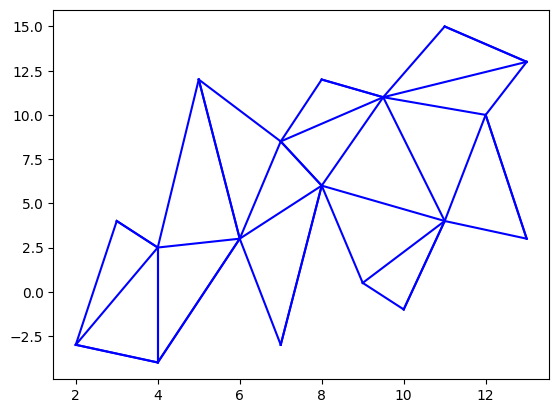

In [8]:
def posci(p, q, r): #Determina si el punto r esta arriba o abajo de la linea formada por los puntos p y q
    return (r[1] - p[1]) * (q[0] - p[0]) < (q[1] - p[1]) * (r[0] - p[0])


def triangulate_ymonotone_polygon(vertices):
    vertices = sorted(vertices, key=lambda vertex: vertex[1]) #Se ordenan por la coordenada y
    s = []
    aristas = []
    s.append(vertices[0])   #Se añaden los dos primeros manualmente 
    s.append(vertices[1])   
    
    
    for i in range(2, len(vertices)): #Se recorre la lista desde el 3 hasta el final  
        while len(s) > 1: #Se itera hasta que queden dos en el stack (next y next_top) 
            # Get the top two vertices on the stack
            top = s[-1]  
            next_top = s[-2]
            
            # Check if the vertex i is below the line between the top two vertices
            if posci(top, next_top, vertices[i]): #Si el vertice a evaluar esta debajo de la linea entre los otros dos vertices 
                aristas.append((next_top, top)) #Se añade la arista de los dos ultimos en el queue 
                s.pop()  
            
            aristas.append((top, vertices[i])) #Se añade una diagonal entre los vertices superiores e i 
            s.pop() #Se elimina el vertice superior (el de la diagonal) del querie
        s.append(vertices[i]) #se añade el vertice al stack s 
    
    return aristas #Se retornan las aristas para iniciar la triangulacion 


u1=[(4,-4),(4,2.5),(3,4),(2,-3),(4,-4)]
t1=triangulate_ymonotone_polygon(u1)  #Se le aplica la funcion a cada uno de las particiones y-monotonas 
u2= [(4,-4),(6,3),(5,12),(4,2.5),(4,-4)]
t2=triangulate_ymonotone_polygon(u2)
u3 = [(6,3),(7,-3),(8,6),(7,8.5),(5,12),(6,3)]
t3=triangulate_ymonotone_polygon(u3)
u4 = [(8,6),(7,8.5),(8,12),(9.5,11),(11,4),(10,-1),(9,0.5)]
t4=triangulate_ymonotone_polygon(u4)
u5 = [(11,4),(9.5,11),(11,15),(13,13),(12,10),(13,3)]
t5=triangulate_ymonotone_polygon(u5)


fig, ax = plt.subplots()
u=( (9, 0.5),(8, 6), (7, -3), (6, 3), (4, -4), (2, -3), (3, 4), (4, 2.5), 
   (5, 12), (7, 8.5), (8, 12), (9.5, 11), (11, 15), (13, 13), (12, 10), (13, 3), (11, 4), (10, -1), (9, 0.5))
f=-1
for i in range(0,len(u)-1):  #Se grafica el poligono original 
    f=f+1
    g=u[f]
    h=u[f+1]
    ax.plot([g[0], h[0]], [g[1], h[1]], color='blue')
    
f=-1
gty=[(4,-4),(8,6),(9.5,11),(6,3)]
gtyf=[(4,2.5),(7,8.5),(11,4),(5,12)]

for i in range(0,len(gty)):  #Se grafican las aristas que lo vuelven y-monotono 
    f=f+1
    g=gty[f]
    h=gtyf[f]
    ax.plot([g[0], h[0]], [g[1], h[1]], color='blue')

tdef = t1+t2+t3+t4+t5   #Se unen todas las diagonales que triangulan a los y-monotonos 
tdef = list(set(tdef)) #Se eliminan duplicados 

f=-1
for i in range(0,len(tdef)):  #Se grafican todas las aristas que lo triangulan 
    f=f+1
    g=tdef[f]
    h=g[0]
    d=g[1]
   
    ax.plot([h[0], d[0]], [h[1], d[1]], color='blue')

t=((6,3),(7,8.5)) # Una diagonal que no sale en la triangulacion pero es fundamental 
ax.plot ([t[0][0], t[1][0]], [t[0][1], t[1][1]], color='blue')
plt.show()
   
#Finalmente como el problema nos pide convertirlo en una lista de aristas doblemente conectadas se realiza el proceso 

doble=[]
f=-1    
for i in range(len(tdef)):
    f=f+1
    uy=arista()
    uj=arista()
    t=tdef[f]
    uy.origin=(t[0][0],t[0][1]) 
    uy.fin = (t[1][0],t[1][1]) 
    uj.fin=(t[0][0],t[0][1]) 
    uj.origin = (t[1][0],t[1][1])
    uy.twin=uj
    uj.twin=uy
    uy.sentido =True 
    uj.sentido=False 
    doble.append(uy)
    doble.append(uj)
    
    


Punto 4

Para este punto se utiliza una 3-coloracion manual 

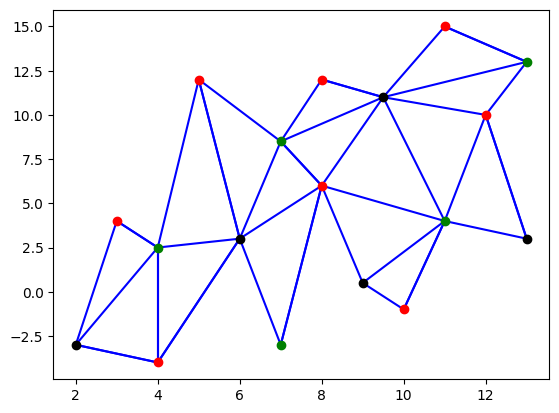

In [14]:
u1=[(4,-4),(4,2.5),(3,4),(2,-3),(4,-4)]
t1=triangulate_ymonotone_polygon(u1)  #Se le aplica la funcion a cada uno de las particiones y-monotonas 
u2= [(4,-4),(6,3),(5,12),(4,2.5),(4,-4)]
t2=triangulate_ymonotone_polygon(u2)
u3 = [(6,3),(7,-3),(8,6),(7,8.5),(5,12),(6,3)]
t3=triangulate_ymonotone_polygon(u3)
u4 = [(8,6),(7,8.5),(8,12),(9.5,11),(11,4),(10,-1),(9,0.5)]
t4=triangulate_ymonotone_polygon(u4)
u5 = [(11,4),(9.5,11),(11,15),(13,13),(12,10),(13,3)]
t5=triangulate_ymonotone_polygon(u5)


fig, ax = plt.subplots()
u=( (9, 0.5),(8, 6), (7, -3), (6, 3), (4, -4), (2, -3), (3, 4), (4, 2.5), 
   (5, 12), (7, 8.5), (8, 12), (9.5, 11), (11, 15), (13, 13), (12, 10), (13, 3), (11, 4), (10, -1), (9, 0.5))
f=-1
for i in range(0,len(u)-1):  #Se grafica el poligono original 
    f=f+1
    g=u[f]
    h=u[f+1]
    ax.plot([g[0], h[0]], [g[1], h[1]], color='blue')
    
f=-1
gty=[(4,-4),(8,6),(9.5,11),(6,3)]
gtyf=[(4,2.5),(7,8.5),(11,4),(5,12)]

for i in range(0,len(gty)):  #Se grafican las aristas que lo vuelven y-monotono 
    f=f+1
    g=gty[f]
    h=gtyf[f]
    ax.plot([g[0], h[0]], [g[1], h[1]], color='blue')

tdef = t1+t2+t3+t4+t5   #Se unen todas las diagonales que triangulan a los y-monotonos 
tdef = list(set(tdef)) #Se eliminan duplicados 

f=-1
for i in range(0,len(tdef)):  #Se grafican todas las aristas que lo triangulan 
    f=f+1
    g=tdef[f]
    h=g[0]
    d=g[1]
   
    ax.plot([h[0], d[0]], [h[1], d[1]], color='blue')

t=((6,3),(7,8.5)) # Una diagonal que no sale en la triangulacion pero es fundamental 
ax.plot ([t[0][0], t[1][0]], [t[0][1], t[1][1]], color='blue')




ax.plot(9, 0.5, 'ko')
ax.plot(8, 6, 'ro')
ax.plot(7, -3, 'go')
ax.plot(6, 3, 'ko')
ax.plot(4, -4, 'ro')
ax.plot(2, -3, 'ko')
ax.plot(3, 4, 'ro')
ax.plot(4, 2.5, 'go')
ax.plot(5, 12, 'ro')
ax.plot(7, 8.5, 'go')
ax.plot(8, 12, 'ro')
ax.plot(9.5, 11, 'ko')
ax.plot(11, 15, 'ro')
ax.plot(13, 13, 'go')
ax.plot(12, 10, 'ro')
ax.plot(13, 3, 'ko')
ax.plot(11, 4, 'go')
ax.plot(10, -1, 'ro')


plt.show()

Por lo que se nescestitan 5 camaras para vigilar todo el poligono, y pueden estar en los vertices:
[(9,0.5),(6,3),(2,-3),(9.5,11),(13,3)] o en 
[(7,-3),(4,2.5),(7,8.5),(13,13),(11,4)],
es decir los que estan coloreados verde o negro 